In [ ]:
! python -m pip install --upgrade pip
! python -m pip install pandas 
! python -m pip install matplotlib 
! python -m pip install seaborn 
! python -m pip install scikit-learn

^C


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

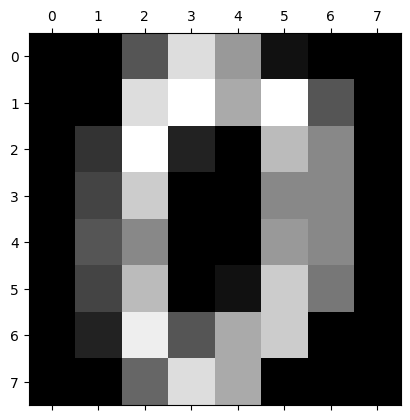

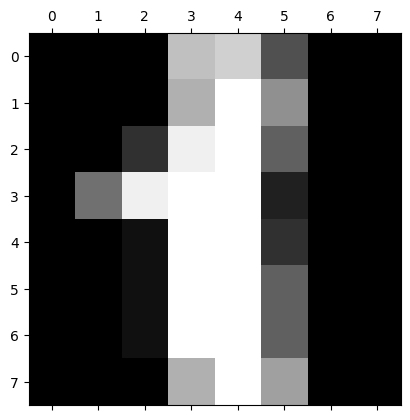

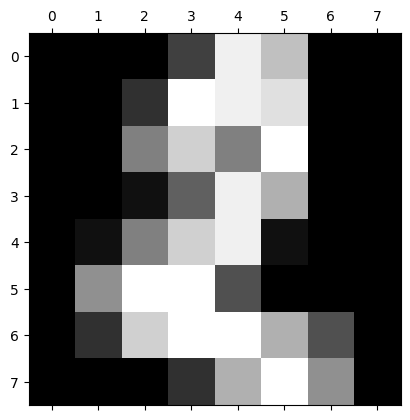

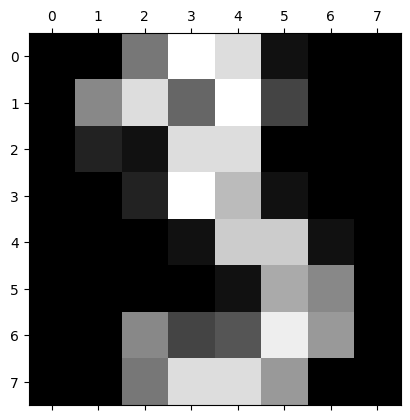

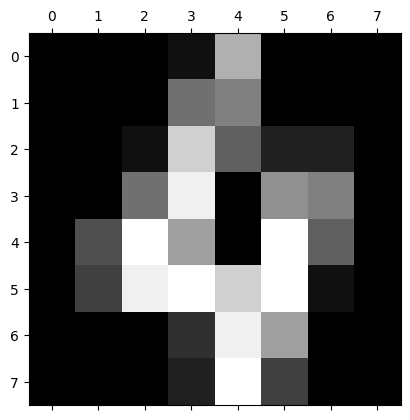

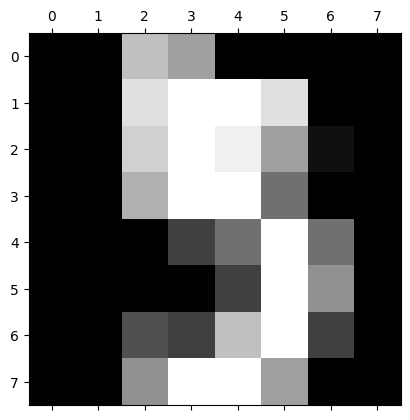

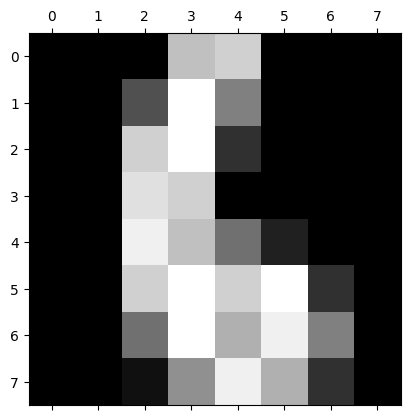

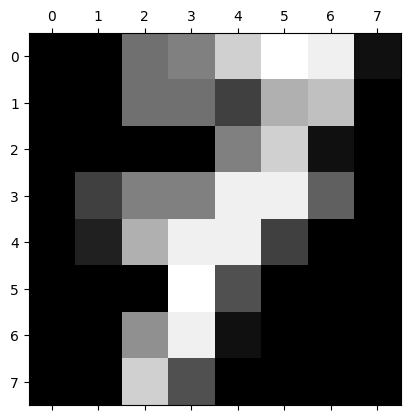

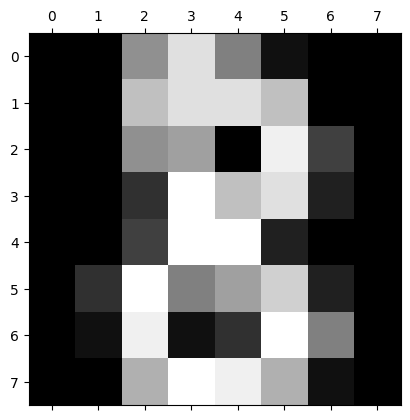

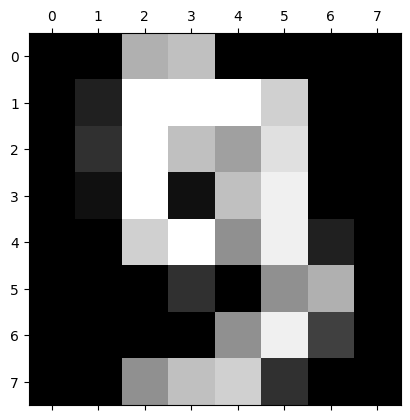

In [12]:
digits = load_digits()
for i in range(10):
    plt.matshow(digits.images[i], cmap='gray')
plt.show()

In [13]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [15]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target
print(df.head())

     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]


In [31]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis= 'columns'), df['target'], test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

optimal_n_estimators = 0
optimal_accuracy = 0
for i in range(10,110, 10):
    model = RandomForestClassifier(n_estimators=i, random_state=42)
    model.fit(x_train, y_train)
    optimal_n_estimators = i if model.score(x_test, y_test) > optimal_accuracy else optimal_n_estimators
    optimal_accuracy = max(model.score(x_test, y_test), optimal_accuracy)
    # print(f"Number of estimators: {i}, Accuracy: {model.score(x_test, y_test)}")

print(f"Optimal number of estimators: {optimal_n_estimators}, Accuracy: {optimal_accuracy}")
    

Optimal number of estimators: 50, Accuracy: 0.9722222222222222


In [32]:
y_predicted = model.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

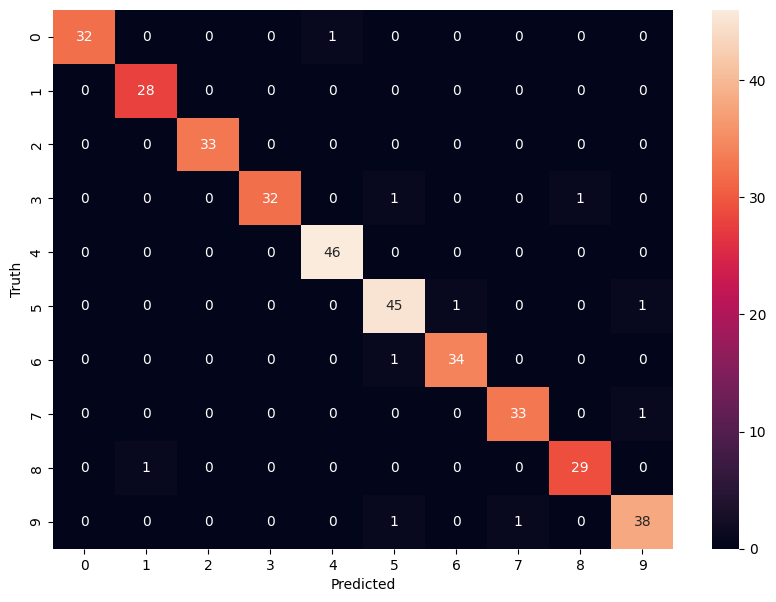

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()